<a href="https://colab.research.google.com/github/arsalanmontazeri/Arsalan-Montazeri/blob/TOP100_IMDB/100_IMDB_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import numpy as np
# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# For displaying all of the columns in dataframes
pd.set_option('display.max_column',None)
# For data modeling
from xgboost import XGBClassifier
from xgboost import plot_importance
from xgboost import XGBRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
# For saving models
import pickle

In [20]:
TOP_100=pd.read_csv('TOP 100 IMDB MOVIES.csv')

In [21]:
TOP_100.head()

,rank,title,description,genre,rating,year
0,18,Spider-Man: Across the Spider-Verse,"Miles Morales catapults across the Multiverse,...","['Animation', 'Action', 'Adventure']",8.7,2023
1,32,Oppenheimer,"The story of American scientist, J. Robert Opp...","['Biography', 'Drama', 'History']",8.6,2023
2,77,Joker,A mentally troubled stand-up comedian embarks ...,"['Crime', 'Drama', 'Thriller']",8.4,2019
3,76,Avengers: Endgame,After the devastating events of Avengers: Infi...,"['Action', 'Adventure', 'Drama']",8.4,2019
4,37,Parasite,Greed and class discrimination threaten the ne...,"['Drama', 'Thriller']",8.5,2019


In [22]:
TOP_100.shape

(100, 6)

In [23]:
TOP_100.describe()

,rank,rating,year
count,100.000000,100.00000,100.000000
mean,50.500000,8.52200,1988.070000
std,29.011492,0.20869,23.069178
min,1.000000,8.30000,1931.000000
25%,25.750000,8.40000,1974.750000
50%,50.500000,8.50000,1994.000000
75%,75.250000,8.60000,2003.250000
max,100.000000,9.30000,2023.000000


In [24]:
TOP_100.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rank         100 non-null    int64  
 1   title        100 non-null    object 
 2   description  100 non-null    object 
 3   genre        100 non-null    object 
 4   rating       100 non-null    float64
 5   year         100 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 4.8+ KB


In [25]:
TOP_100.isna().sum()

,0
rank,0
title,0
description,0
genre,0
rating,0
year,0


In [26]:
df=TOP_100.copy()

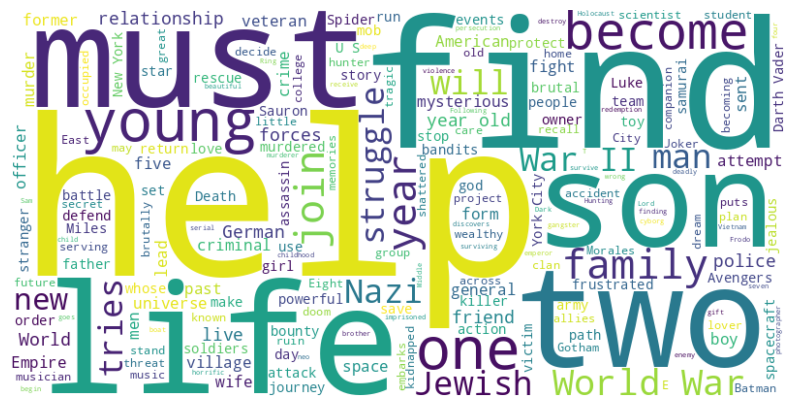

In [27]:
# Combine all descriptions into one text
!pip install wordcloud
from wordcloud import WordCloud
all_descriptions = ' '.join(df['description'].values)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_descriptions)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

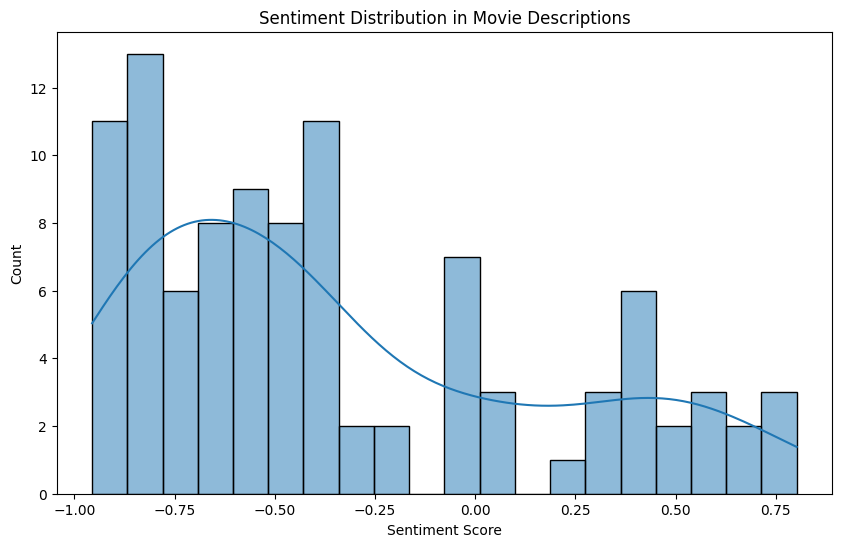

In [28]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()


# Apply sentiment analysis to the movie descriptions
df['sentiment'] = df['description'].apply(lambda desc: sia.polarity_scores(desc)['compound'])

# Visualize sentiment distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['sentiment'], bins=20, kde=True)
plt.title('Sentiment Distribution in Movie Descriptions')
plt.xlabel('Sentiment Score')
plt.show()

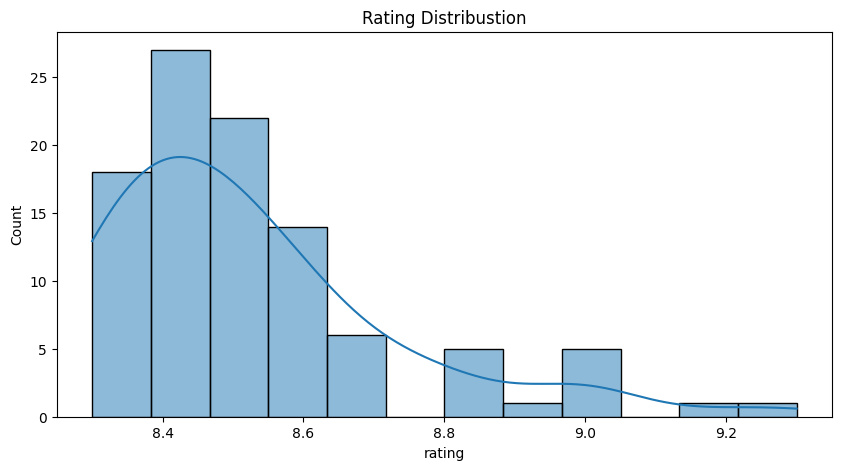

In [29]:
plt.figure(figsize=(10,5))
sns.histplot(data=TOP_100,x='rating',kde=True)
plt.title('Rating Distribustion')
plt.show()

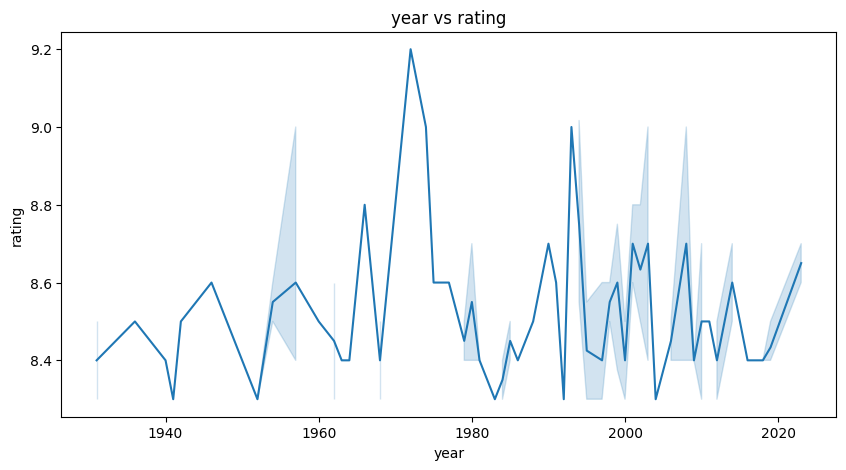

In [30]:
plt.figure(figsize=(10,5))
sns.lineplot(data=TOP_100,x='year',y='rating')
plt.title('year vs rating')
plt.show()

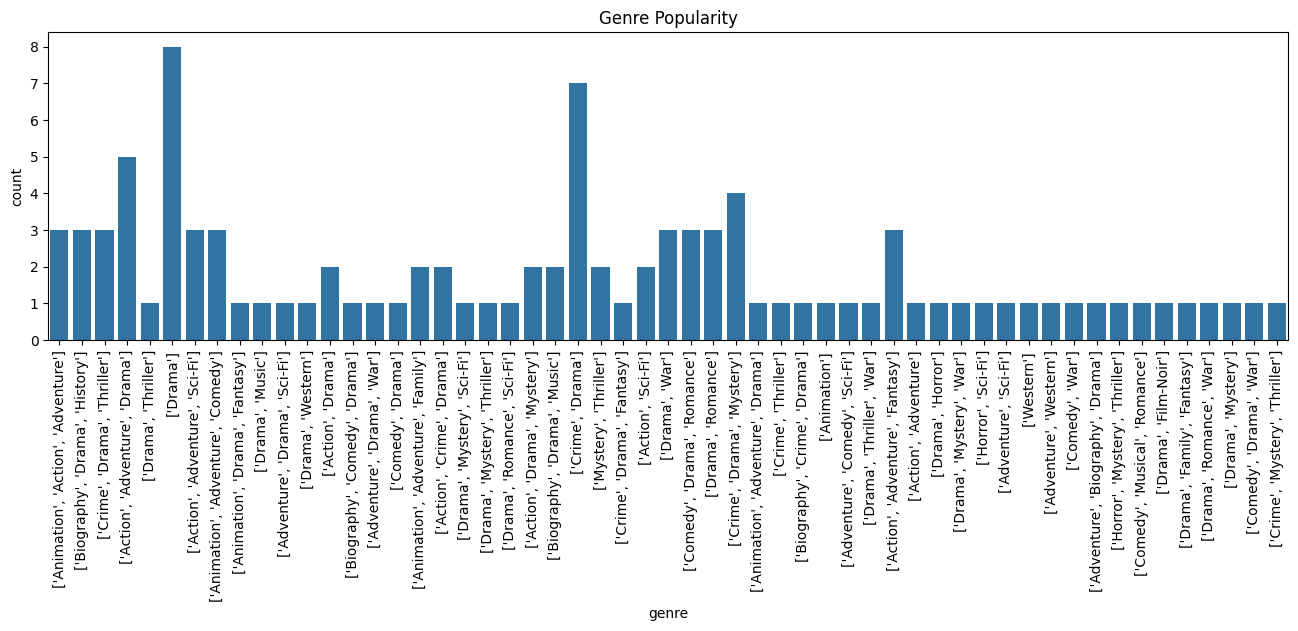

In [31]:
plt.figure(figsize=(16,4))
sns.countplot(data=TOP_100,x='genre')
plt.xticks(rotation=90)
plt.title('Genre Popularity')
plt.show()

<ipython-input-32-f7ffd00bae56>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_rating,x='genre',y='rating',palette='coolwarm')


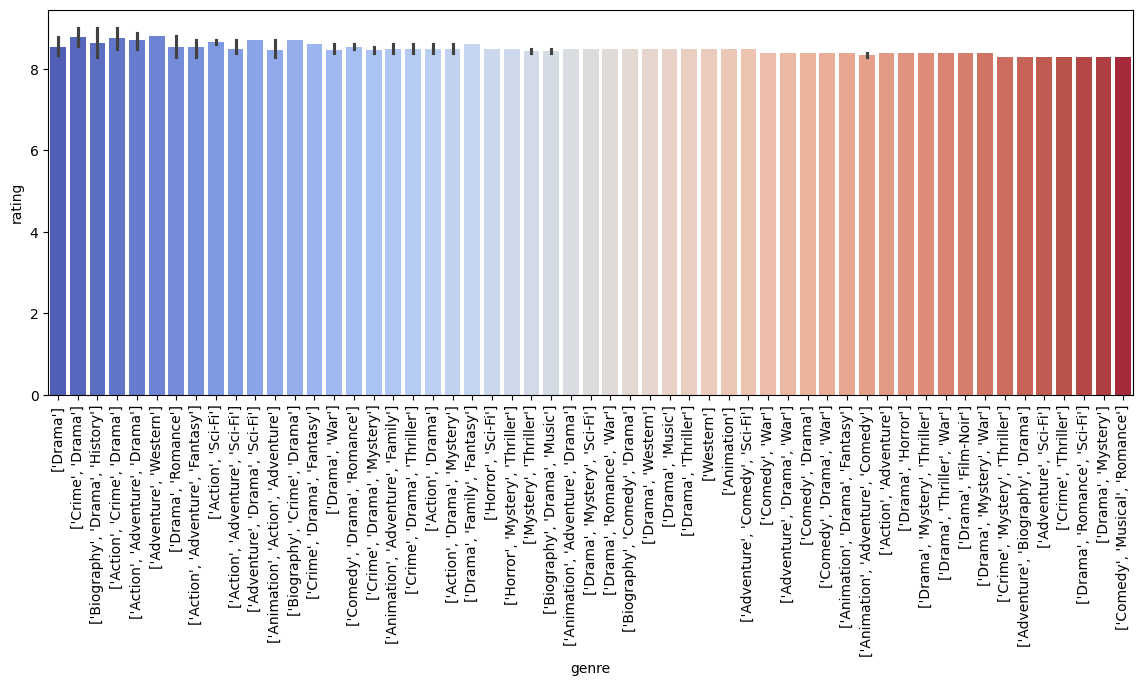

In [32]:
olli=TOP_100.groupby(['year','genre','rank'])['rating'].mean().reset_index()
top_rating=olli.sort_values(by='rating',ascending=False)
top_rating.head(10)
plt.figure(figsize=(14,5))
sns.barplot(data=top_rating,x='genre',y='rating',palette='coolwarm')
plt.xticks(rotation=90)
plt.show()


                                                title  rating  rank  \
90                           The Shawshank Redemption     9.3     1   
75                                      The Godfather     9.2     2   
0                                        12 Angry Men     9.0     5   
59                                   Schindler's List     9.0     6   
72                                    The Dark Knight     9.0     3   
85      The Lord of the Rings: The Return of the King     9.0     7   
76                              The Godfather Part II     9.0     4   
54                                       Pulp Fiction     8.9     8   
86              The Lord of the Rings: The Two Towers     8.8    13   
84  The Lord of the Rings: The Fellowship of the Ring     8.8     9   

                                genre  year  0  
90                          ['Drama']  1994  1  
75                 ['Crime', 'Drama']  1972  1  
0                  ['Crime', 'Drama']  1957  1  
59  ['Biography', 'Dra

<ipython-input-84-8496c1a8f321>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=high_imdb,x='title',y='rating',palette='viridis')


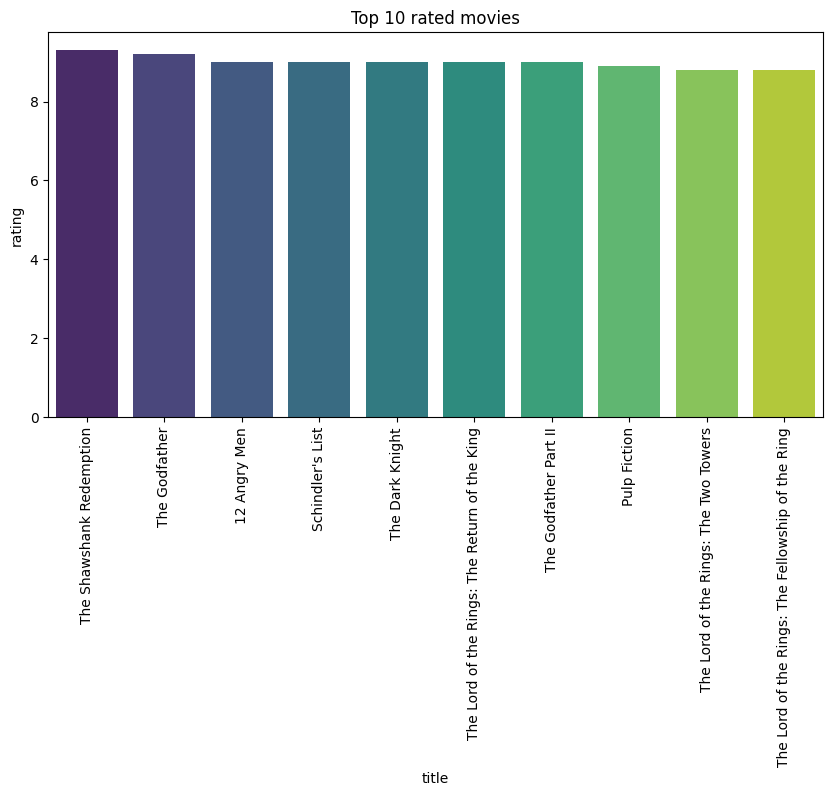

In [84]:
top_10_high_IMDB=df.groupby(['title','rating','rank','genre','year']).size().reset_index()
high_imdb=top_10_high_IMDB.sort_values(by='rating',ascending=False).head(10)
print(high_imdb)
plt.figure(figsize=(10,5))
sns.barplot(data=high_imdb,x='title',y='rating',palette='viridis')
plt.title('Top 10 rated movies')
plt.xticks(rotation=90)
plt.show()

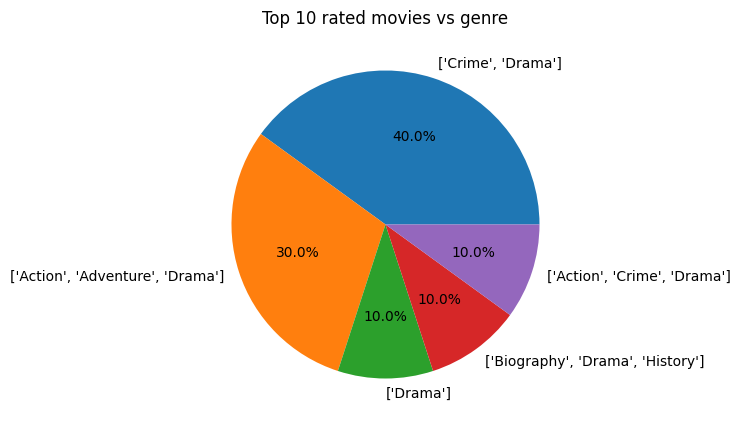

In [65]:
plt.figure(figsize=(10, 5))

genre_counts = high_imdb['genre'].value_counts()

plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%')

plt.title('Top 10 rated movies vs genre')
plt.show()

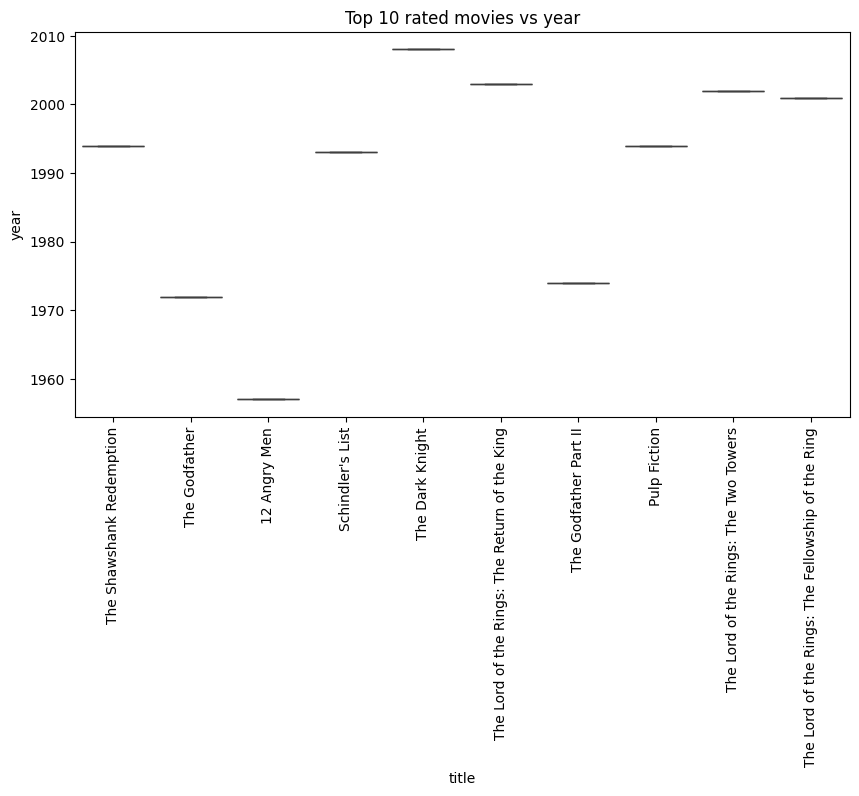

In [88]:
plt.figure(figsize=(10,5))
sns.boxplot(data=high_imdb,x='title',y='year')
plt.title('Top 10 rated movies vs year')
plt.xticks(rotation=90)
plt.show()

In [85]:
low_imdb=top_10_high_IMDB.sort_values(by='rating',ascending=True).head(10).reset_index()
low_imdb

,index,title,rating,rank,genre,year,0
0,32,Ikiru,8.3,97,['Drama'],1952,1
1,46,Once Upon a Time in America,8.3,88,"['Crime', 'Drama']",1984,1
2,16,Citizen Kane,8.3,99,"['Drama', 'Mystery']",1941,1
3,68,Star Wars: Episode VI - Return of the Jedi,8.3,92,"['Action', 'Adventure', 'Fantasy']",1983,1
4,23,Eternal Sunshine of the Spotless Mind,8.3,93,"['Drama', 'Romance', 'Sci-Fi']",2004,1
5,12,Braveheart,8.3,85,"['Biography', 'Drama', 'History']",1995,1
6,52,Princess Mononoke,8.3,86,"['Animation', 'Action', 'Adventure']",1997,1
7,39,Lawrence of Arabia,8.3,98,"['Adventure', 'Biography', 'Drama']",1962,1
8,57,Reservoir Dogs,8.3,96,"['Crime', 'Thriller']",1992,1
9,56,Requiem for a Dream,8.3,90,['Drama'],2000,1


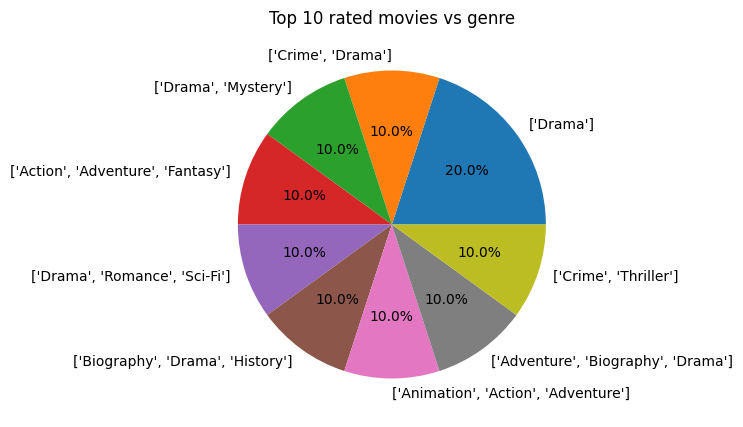

In [69]:
plt.figure(figsize=(10, 5))

genre_counts = low_imdb['genre'].value_counts()

plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%')

plt.title('Top 10 rated movies vs genre')
plt.show()

<ipython-input-71-32ab95bb014f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=low_imdb,x='rank',y='title',palette='viridis')


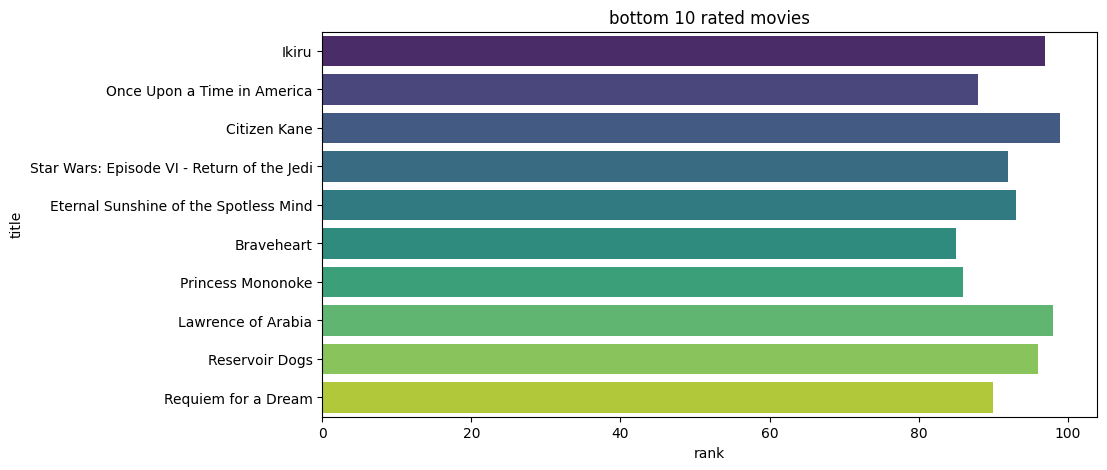

In [71]:
plt.figure(figsize=(10,5))
sns.barplot(data=low_imdb,x='rank',y='title',palette='viridis')
plt.title('bottom 10 rated movies')
plt.show()

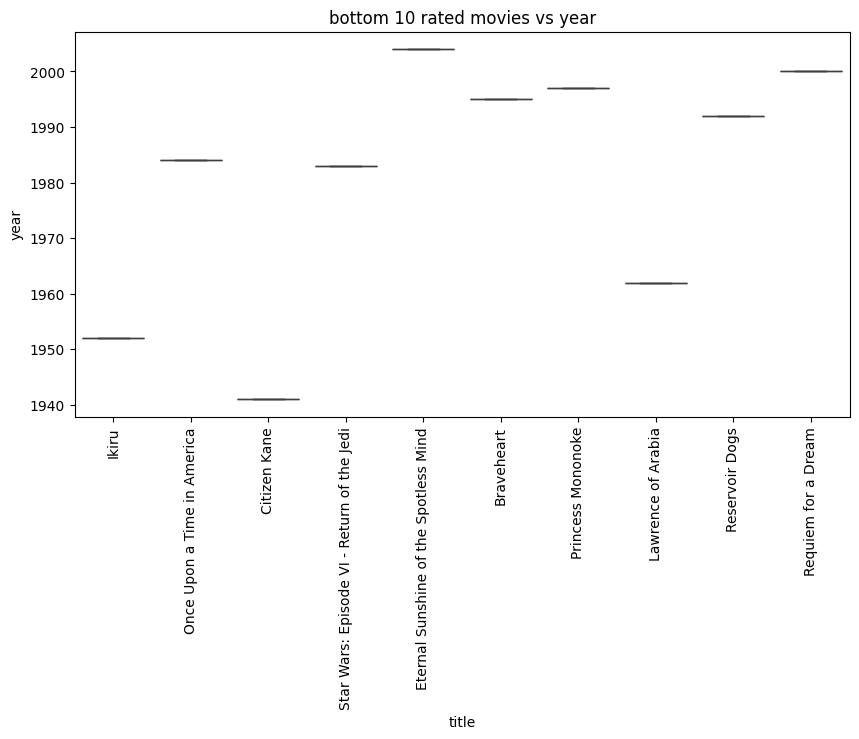

In [87]:
plt.figure(figsize=(10,5))
sns.boxplot(data=low_imdb,x='title',y='year')
plt.title('bottom 10 rated movies vs year')
plt.xticks(rotation=90)
plt.show()

In [95]:
movies_last_century=df[(df['year']<2024) & (df['year']>=2000)]
movies_last_century.head()

,rank,title,description,genre,rating,year,sentiment
0,18,Spider-Man: Across the Spider-Verse,"Miles Morales catapults across the Multiverse,...","['Animation', 'Action', 'Adventure']",8.7,2023,0.4019
1,32,Oppenheimer,"The story of American scientist, J. Robert Opp...","['Biography', 'Drama', 'History']",8.6,2023,-0.4939
2,77,Joker,A mentally troubled stand-up comedian embarks ...,"['Crime', 'Drama', 'Thriller']",8.4,2019,-0.4404
3,76,Avengers: Endgame,After the devastating events of Avengers: Infi...,"['Action', 'Adventure', 'Drama']",8.4,2019,-0.8020
4,37,Parasite,Greed and class discrimination threaten the ne...,"['Drama', 'Thriller']",8.5,2019,-0.4215
